# Deep Neural Network Test

In this notebook I will test performance of the created neural network model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from neural_network import nn_model, predict

# 1 - Cats Dataset 

I will test neural network over dataset provided in the Week 4 of the Neural Networks and Deep Learning course. 
The given dataset contains:
 - a trainig set of 209 images labelled as cat (1) or non-cat (0)
 - a test set of 50 images labelled as cat and non-cat
 - each image is of shape (64 x 64 x 3) where 3 is for the 3 channels (RGB)

First, I will load and adjust given matrices. This part is copied from the assignment notebook.

In [2]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

Show the chosen image in the dataset.

y = 1. It's a cat picture.


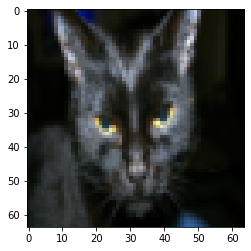

In [3]:
# Example of a picture
index = 25
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

We need to reshape and standardize the images before feeding them to the network.

In [4]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Now we are ready to feed our training data to the neural network model. We start with setting up some hyperparameters.

In [23]:
# Each number in the list represents number
# of units in the corresponding layer
layer_dims = [12288, 20, 7, 5, 1]

# Defines which activation function will be used
# in the corresponding layer
activations = ['relu', 'relu', 'relu', 'sigmoid']

learning_rate = 0.009
num_iterations = 2000

Cost after iteration 0: 0.724647
Cost after iteration 100: 0.614715
Cost after iteration 200: 0.535043
Cost after iteration 300: 0.520931
Cost after iteration 400: 0.444630
Cost after iteration 500: 0.350210
Cost after iteration 600: 0.277794
Cost after iteration 700: 0.141752
Cost after iteration 800: 0.136966
Cost after iteration 900: 0.065827
Cost after iteration 1000: 0.038119
Cost after iteration 1100: 0.023451
Cost after iteration 1200: 0.016826
Cost after iteration 1300: 0.012800
Cost after iteration 1400: 0.010180
Cost after iteration 1500: 0.008358
Cost after iteration 1600: 0.006978
Cost after iteration 1700: 0.005965
Cost after iteration 1800: 0.005188
Cost after iteration 1900: 0.004553


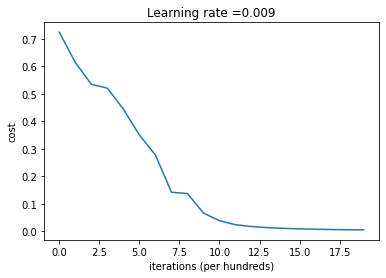

In [24]:
parameters = nn_model(train_x, train_y, layer_dims, activations, learning_rate, num_iterations, print_cost=True)

Now we can use the trained parameters to classify images from the training and test sets.

In [28]:
pred_train = predict(train_x, train_y, parameters, activations)

Accuracy: 0.9999999999999998


In [29]:
pred_test = predict(test_x, test_y, parameters, activations)

Accuracy: 0.74


As we can see our neural network has accuracy of over 99% and 74% on training set and test set respectively.